# Task # 3 - To Explore Unsupervised Machine Learning
### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. 

### K- Means Clustering

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

#### Loading iris dataset

In [2]:
iris = load_iris()

#### Inspecting data

In [3]:
print(iris['data'][:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


#### Inspecting target

In [4]:
print(iris['target'][:5])

[0 0 0 0 0]


#### Inspecting feature names

In [5]:
print(iris['feature_names'][:4])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### Creating a dataframe by concatinating 'data', 'target' and 'feature names'

In [6]:
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
data1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


### Feature and Target
* X = Features
* y = target



In [7]:
X = iris['data']
y = iris['target']

In [8]:
print(f"Features - {X[0]}")
print(f"Target - y[0]")

Features - [5.1 3.5 1.4 0.2]
Target - y[0]


### Determining optimum number of clusters

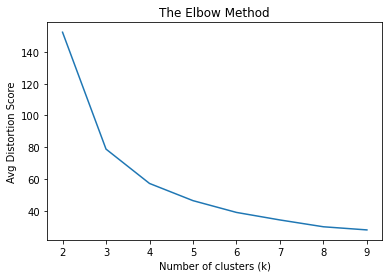

In [9]:
from sklearn.cluster import KMeans
inertia = []
ax = []
for i in range(2,10):
    ax.append(i)
    kmeans= KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
plt.plot(ax,inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Avg Distortion Score')
plt.show()

#### Note

* the underlying model fits best at the point k = 3.

In [10]:
def display_legend():
    from collections import OrderedDict
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    plt.show() 

### K-means clusturing

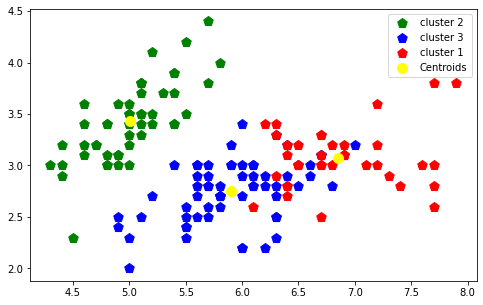

In [11]:
kmeans = KMeans(n_clusters=3, init = 'k-means++', random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.figure(figsize=(8,5))
colors = {0:['cluster 1','red'],1:['cluster 2','green'],2:['cluster 3','blue']}
for a,b in zip(X,y_pred):
    plt.scatter(a[0],a[1], color=colors[b][1], marker=(5, 0), s=100, label=colors[b][0])

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
    
display_legend()




<a id= "PCA"></a> [_](#features)
### PCA (Principal Component Analysis)                                               

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
xp = pca.fit_transform(X)

### Plotting - to reorient the data from the original axes to the ones represented by the principal components

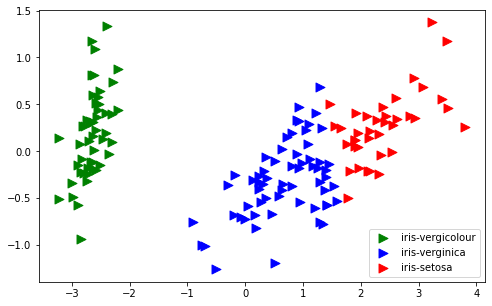

In [13]:
plt.figure(figsize=(8,5))
colors = {0:['iris-setosa','red'],1:['iris-vergicolour','green'],2:['iris-verginica','blue']}
for a,b in zip(xp,y_pred):
    plt.scatter(a[0],a[1], color=colors[b][1], s=80, marker=">", label=colors[b][0])
    
display_legend()

### THANK YOU